Epoch: 0, Train Loss (class 1): 0.4615, Train Loss (class -1): 0.5833
Epoch: 10, Train Loss (class 1): 0.0000, Train Loss (class -1): 0.0000
Epoch: 20, Train Loss (class 1): 0.0000, Train Loss (class -1): 0.0000
Epoch: 30, Train Loss (class 1): 0.0000, Train Loss (class -1): 0.0000
Epoch: 40, Train Loss (class 1): 0.0000, Train Loss (class -1): 0.0000


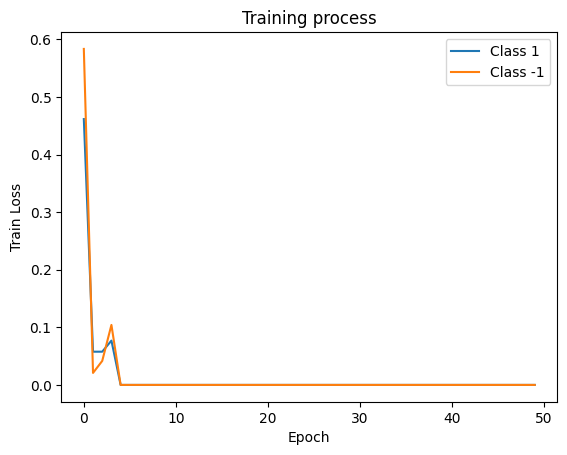

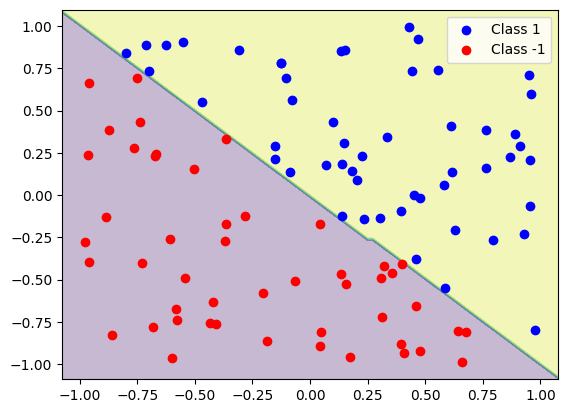

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# تعیین پارامترهای مدل
learning_rate = 0.1
num_epochs = 50

# تولید داده‌های آموزش
np.random.seed(0)
num_data = 100
x_data = np.random.uniform(low=-1, high=1, size=(num_data, 2))
y_data = np.zeros(shape=(num_data,))
for i in range(num_data):
    if x_data[i, 0] + x_data[i, 1] > 0:
        y_data[i] = 1
    else:
        y_data[i] = -1

# تعریف مدل
input_dim = 2
output_dim = 1
weights = np.random.randn(input_dim, output_dim)
bias = 0

def perceptron(x):
    linear_output = np.dot(x, weights) + bias
    y_pred = np.where(linear_output > 0, 1, -1)
    return y_pred

# آموزش مدل
train_loss_1 = []
train_loss_2 = []
for epoch in range(num_epochs):
    y_pred = perceptron(x_data)
    train_loss_value_1 = np.mean(y_data[y_data == 1] != y_pred[y_data == 1])
    train_loss_value_2 = np.mean(y_data[y_data == -1] != y_pred[y_data == -1])
    train_loss_1.append(train_loss_value_1)
    train_loss_2.append(train_loss_value_2)

    if epoch % 10 == 0:
        print("Epoch: %d, Train Loss (class 1): %.4f, Train Loss (class -1): %.4f" % (epoch, train_loss_value_1, train_loss_value_2))

    for i in range(num_data):
        y_pred_i = perceptron(x_data[i, :])
        if y_data[i] != y_pred_i:
            weights += learning_rate * y_data[i] * np.reshape(x_data[i, :], (2, 1))
            bias += learning_rate * y_data[i]

# نمایش خطای آموزش در هر دوره
plt.plot(train_loss_1, label='Class 1')
plt.plot(train_loss_2, label='Class -1')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training process')
plt.legend()
plt.show()

# نمایش نتایج
x_min, x_max = x_data[:, 0].min() - 0.1, x_data[:, 0].max() + 0.1
y_min, y_max = x_data[:, 1].min() - 0.1, x_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
y_pred = perceptron(X)
y_pred = np.reshape(y_pred, xx.shape)

plt.contourf(xx, yy, y_pred, alpha=0.3)
plt.scatter(x_data[y_data == 1, 0], x_data[y_data == 1, 1], c='blue', label='Class 1')
plt.scatter(x_data[y_data == -1, 0], x_data[y_data == -1, 1], c='red', label='Class -1')
plt.legend()
plt.show()